In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df=pd.read_csv("Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [95]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Changing the dtype of Column and also replacing Blanks with 0

In [100]:
df['TotalCharges']=df['TotalCharges'].replace({' ':"0"})

In [102]:
df['TotalCharges']=df['TotalCharges'].astype("float")

In [104]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [106]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [108]:
df.iloc[:,1:].duplicated().sum()

22

In [110]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### two ways to handle the SeniorCitizen Columns values also replacing 1 with Yes and )0 with No

In [112]:
# def change(value):
#     if value==1:
#         return "Yes"
#     else:
#         return "No"

# df['SeniorCitizen']=df['SeniorCitizen'].apply(change)
# df

In [121]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Analysis

### Using Bar Graph

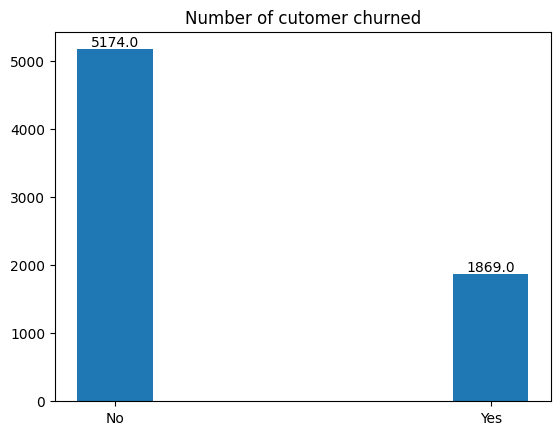

In [236]:
total=df['Churn'].value_counts()

fig,ax=plt.subplots()
bars=ax.bar(total.index,total.values,width=0.2)
ax.bar_label(bars,fmt='%.1f')
plt.title('Number of cutomer churned')
plt.show()

In [161]:
total

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Using Seaborn Countplot

C:\Users\Ayan\AppData\Local\Temp\ipykernel_8600\1957053873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Churn'],palette=colors,width=0.2)


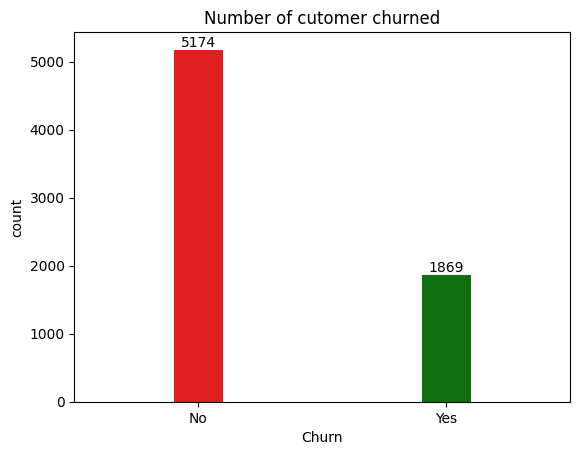

In [238]:
colors=['r','g']
ax=sns.countplot(x=df['Churn'],palette=colors,width=0.2)
plt.title('Number of cutomer churned')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

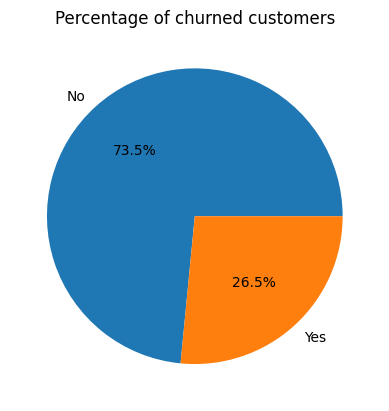

In [230]:
percent=df.groupby('Churn')['Churn'].count()

plt.pie(percent,autopct='%.1f%%',labels=percent.index)
plt.title("Percentage of churned customers")
plt.show()

In [201]:
percent = df['Churn'].value_counts().reset_index()
print(percent)


  Churn  count
0    No   5174
1   Yes   1869


### Exploring Churn by Gender

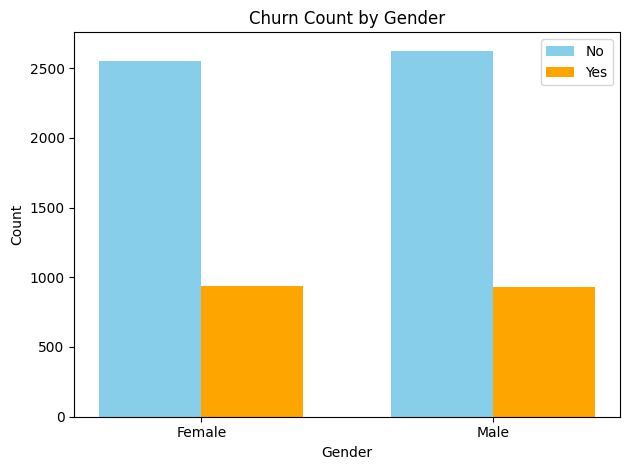

In [354]:

total_churn_gender = df.groupby(['gender', 'Churn']).size().unstack().fillna(0)


labels = total_churn_gender.index  
churn_yes = total_churn_gender['Yes']
churn_no = total_churn_gender['No']

width = 0.35
x = np.arange(len(labels))


fig, ax = plt.subplots()
ax.bar(x - width/2, churn_no, width, label='No', color='skyblue')
ax.bar(x + width/2, churn_yes, width, label='Yes', color='orange')


ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Churn Count by Gender')
ax.legend()

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

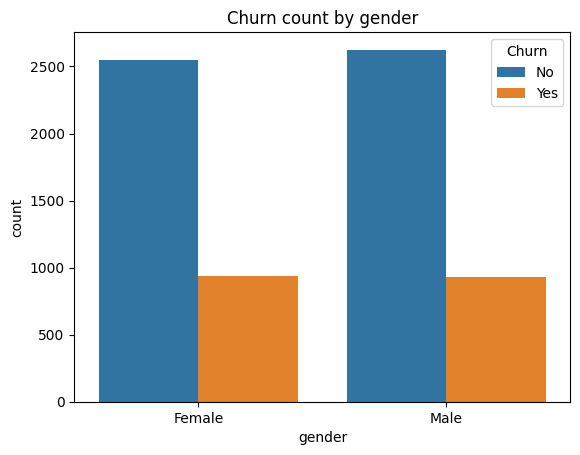

In [356]:
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Churn count by gender')
plt.show

### Exploring churn by Senior Citizen

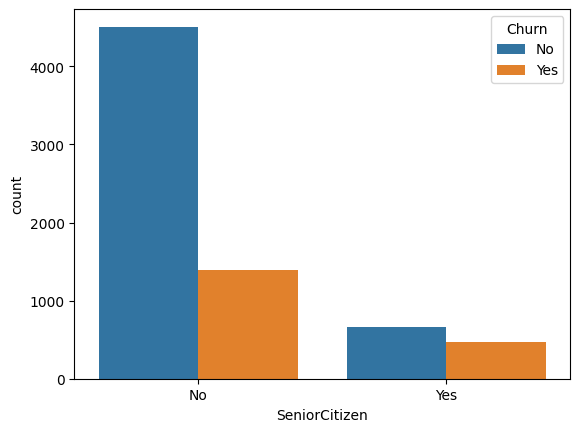

In [361]:
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.show()

In [367]:
senior_data=df.groupby(['SeniorCitizen','Churn']).size().unstack()
senior_data

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


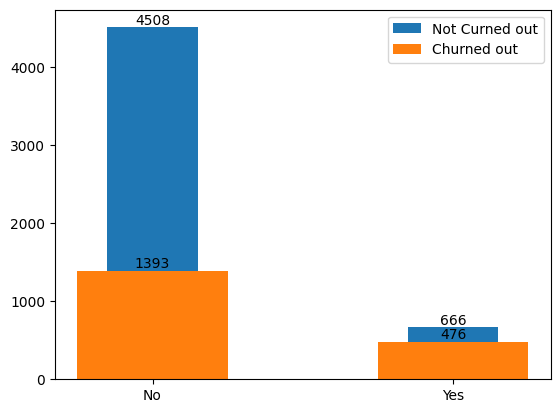

In [387]:
fig,ax=plt.subplots()
x=np.arange(len(senior_data))
ax.bar(senior_data.index,senior_data['No'],width=0.3,label='Not Curned out')
ax.bar(senior_data.index,senior_data['Yes'],width=0.5,label='Churned out')

plt.legend()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [442]:
senior_data['Not_senior_pct']=senior_data['No']/(senior_data['No']+senior_data['Yes'])*100
senior_data['Yes_senior_pct']=senior_data['Yes']/(senior_data['No']+senior_data['Yes'])*100
senior_data

Churn,No,Yes,Not_senior_pct,Yes_senior_pct
SeniorCitizen,,,,
No,4508,1393,76.393832,23.606168
Yes,666,476,58.318739,41.681261


##### From here we can conclude that 41% of SeniorCitizen almost 476 people have churned out

In [448]:
senior_data=senior_data.iloc[:,:2]
senior_data

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


### Checking Senior Data percentage wise using 2 Approaches ("No" wth my approach and 'Yes' with best approach)

In [417]:
pct=0
for index, row in senior_data.iterrows():    
    pct+=row['No']
print(pct)
for index1, row1 in senior_data.iterrows():
    senior_data.loc[index1,'No_pct']=row1['No']/pct *100
    print(senior_data['No_pct'])

5174.0
SeniorCitizen
No     87.127947
Yes    12.872053
Name: No_pct, dtype: float64
SeniorCitizen
No     87.127947
Yes    12.872053
Name: No_pct, dtype: float64


In [419]:
senior_data

Churn,No,Yes,No_pct
SeniorCitizen,,,
No,4508,1393,87.127947
Yes,666,476,12.872053


In [425]:
total_yes_pct=senior_data['Yes'].sum()
total_yes_pct

1869

In [427]:
senior_data['Yes_pct']=senior_data['Yes']/total_yes_pct*100
senior_data

Churn,No,Yes,No_pct,Yes_pct
SeniorCitizen,,,,
No,4508,1393,87.127947,74.531835
Yes,666,476,12.872053,25.468165


In [436]:
senior_data=senior_data.iloc[:,:2]

In [438]:
senior_data

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [440]:
senior_data['Not_senior_pct']=senior_data['No']/(senior_data['No']+senior_data['Yes'])*100
senior_data['Yes_senior_pct']=senior_data['Yes']/(senior_data['No']+senior_data['Yes'])*100
senior_data

C:\Users\Ayan\AppData\Local\Temp\ipykernel_8600\365284007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senior_data['Not_senior_pct']=senior_data['No']/(senior_data['No']+senior_data['Yes'])*100


Churn,No,Yes,Not_senior_pct,Yes_senior_pct
SeniorCitizen,,,,
No,4508,1393,76.393832,23.606168
Yes,666,476,58.318739,41.681261


### Exploring based on Tenure

In [453]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

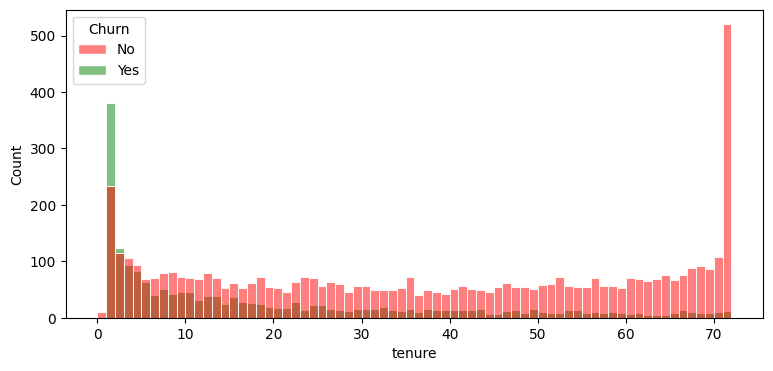

In [489]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,edgecolor='w',hue='Churn',palette=['r','g'])
plt.show()

##### From here we can conclude that mostly people are satisfied and very few people have churned out(Maybe this could be because of the contract they have taken)

### Exploring based on contract

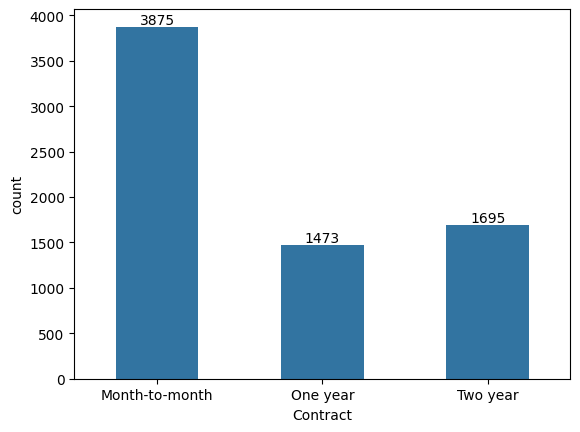

In [505]:
ax=sns.countplot(x='Contract',data=df,width=0.5)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Based on Churned out

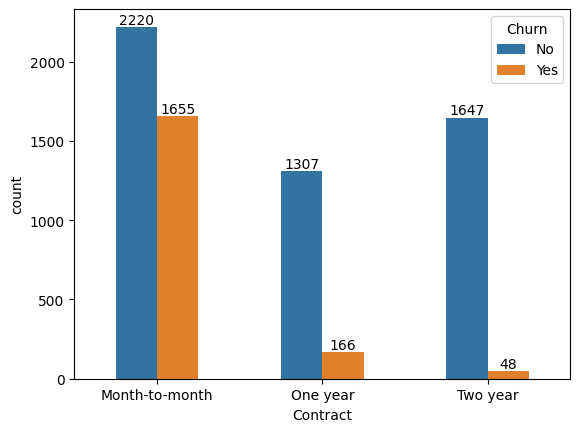

In [508]:
ax=sns.countplot(x='Contract',data=df,width=0.5,hue='Churn')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

##### people who have contract of 1-2 years are less likely to churn

In [514]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

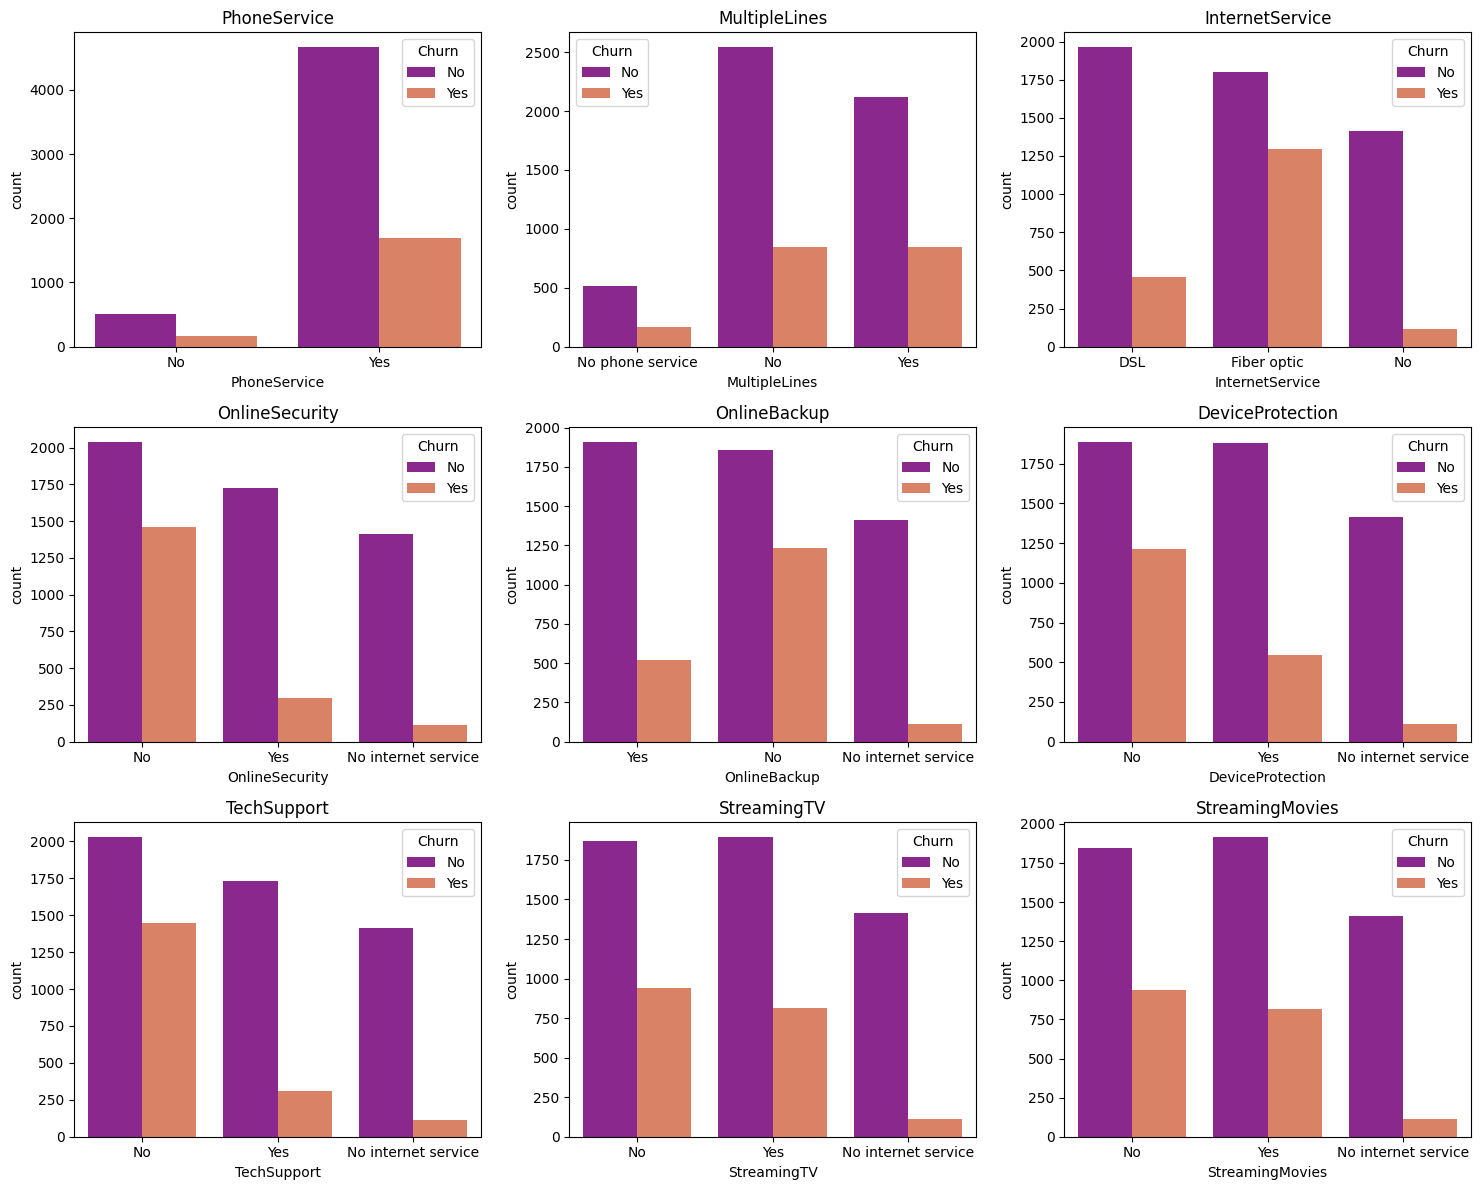

In [552]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fix,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,12))

ax=ax.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=df[col],ax=ax[i],palette='plasma',hue=df['Churn'])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

### Checking Payment Method

In [556]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

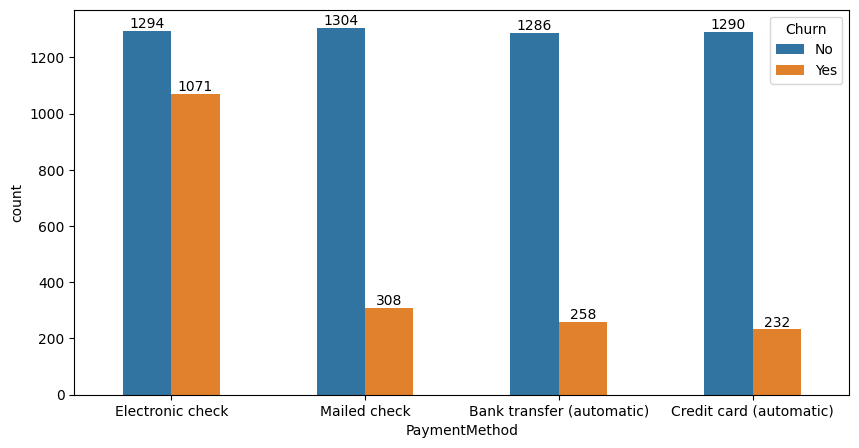

In [587]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='PaymentMethod',data=df,width=0.5,hue='Churn')

for container in ax.containers:
    ax.bar_label(container)
# ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
From here we can 